### 注意

这里画图用的是最后一个(第三个)cell的代码，第二个cell和第三个cell代码的区别是：第二个cell画的是并列柱状图，第三个cell画的是单个柱状图。
两个都可以用来画

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

参考 https://blog.csdn.net/MyName_Guan/article/details/110390312

plt.bar(x, height, width=0.8, bottom=None, *, align=‘center’, data=None, *kwargs)

常用参数，官方文档：

x : 柱状图的每一个柱子的x坐标.

height: 每个柱子的高度.

width: 每个柱子的宽度.

bottom: 每个柱子的起点是多少，默认0.

align: 按照哪里对其，‘center’ 对齐x坐标的中间，‘edge’ 对齐x坐标的右侧.

color: 每根柱子的颜色.

alpha: 柱子的透明度，取值[0,1]

tick_label: 每个柱子x轴上的标签.

[0 1]


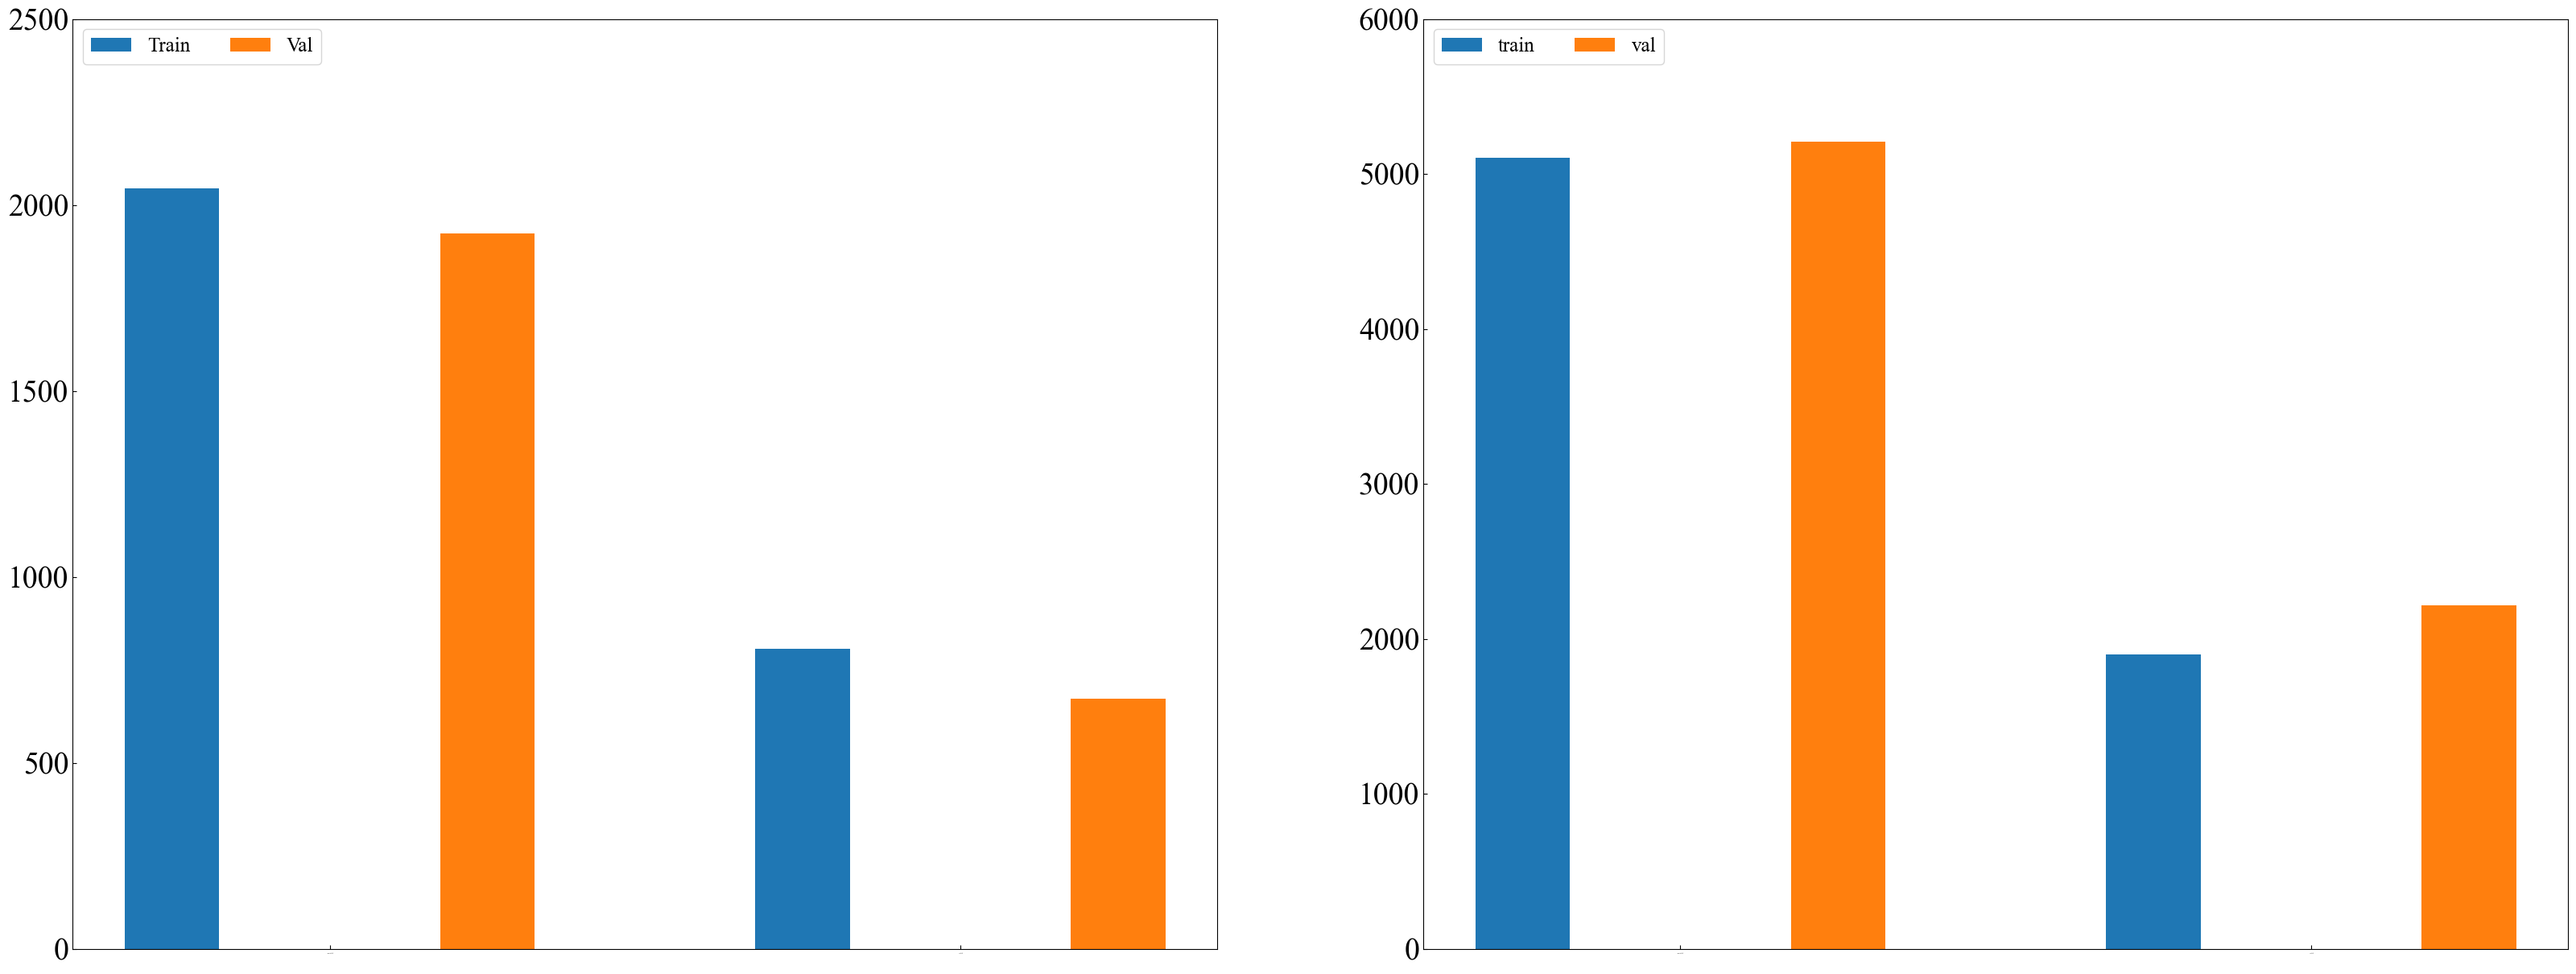

In [42]:
"使用matplotlib在同一张子图上画柱状图和折线图"
# 参考 https://kindhearted57.github.io/2020/11/07/%E5%A6%82%E4%BD%95%E4%BC%98%E9%9B%85%E7%9A%84%E4%BD%BF%E7%94%A8matplotlib%E5%9C%A8%E5%90%8C%E4%B8%80%E5%BC%A0%E5%9B%BE%E4%B8%8A%E7%94%BB%E6%9F%B1%E7%8A%B6%E5%9B%BE%E5%92%8C%E6%8A%98%E7%BA%BF%E5%9B%BE.html
# 参考 https://zhuanlan.zhihu.com/p/205656607
# 参考 https://blog.csdn.net/candice5566/article/details/121444185

# 设定数据
Wa_256_train = [2044.7653, 806.0507]  
# Wa_256_train的类别数目统计结果,类别值为0:20447653;类别值为1:8060507;像素分辨率为10m,因而类别值为0的面积就是20447653*10*10，
# 换算为km2，就是20447653*10*10➗1000➗1000；同理，类别值为1的面积就是8060507*10*10➗1000➗1000
"Wa_256_val的类别数目统计结果,类别值为0:19238290;类别值为1:6713966"
Wa_256_val = [1923.829,  671.3966]
# Wa_256_val的类别数目统计结果,类别值为0:19238290;类别值为1:6713966;像素分辨率为10m,因而类别值为0的面积就是19238290*10*10，
# 换算为km2，就是19238290*10*10➗1000➗1000；同理，类别值为1的面积就是6713966*10*10➗1000➗1000

Ca_256_train = [5101.4497, 1897.7951] 
Ca_256_val = [5205.2514, 2213.4238] 


# fig, ax = plt.subplots(3,2,figsize=(15,15))
fig = plt.figure(figsize=(40,15))
# 修改全局字体为Times New Roman
plt.rc('font',family='Times New Roman')

# 设定图中大小的参数

title_fontsize =28  # title的字体大小
y_labelsize = 27 # y_label的字体大小
x_labelsize = 30 # x_label的字体大小
linewidth = 3 # 图中线条的粗细
legend_fontsize = 18 # legendd的字体大小

labels = ['Non-irrigated','Irrigated']
bar_width = 0.15  # 柱子的宽度
interval = 0.25 # 柱子之间的间距

x_coordinates = np.arange(len(labels))  # x轴刻度标签位置
print(x_coordinates)



# 图1
f_ax1 = fig.add_subplot(121)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
# l1, = f_ax1.bar(x=x_coordinates-width,height=df_Precision["Unet"].values.tolist(),width=width,label='1') # 只能返回一个l1,不是返回2个
# l1 = f_ax1.bar(x=x_coordinates-bar_width,height=Wa_256_train,width=bar_width,label='Train')
# l2 = f_ax1.bar(x=x_coordinates,height=Wa_256_val,width=bar_width,label='Val')
l1 = f_ax1.bar(x=x_coordinates-interval,height=Wa_256_train,width=bar_width,label='Train')
l2 = f_ax1.bar(x=x_coordinates+interval,height=Wa_256_val,width=bar_width,label='Val')

# 设置y轴上的label显示范围
f_ax1.set_ylim(0,2500)  # 根据自己的需要来设定
# xlabel label的位置和内容
plt.xticks(x_coordinates, labels=labels)
# f_ax1.set_xlim(0,13)
# plt.locator_params('x',nbins=6)
# plt.locator_params('x')

# title
# f_ax1.set_title('Precision',loc='left',fontsize=title_fontsize)
# ylabel .
# f_ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4f'))
# xlabel
# f_ax1.xaxis.set_ticklabels(['2018', '2019', '2020', '2021'])
# f_ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# f_ax1.set_xlabel('Month')

# fontsize
f_ax1.yaxis.set_tick_params(labelsize=y_labelsize)
f_ax1.xaxis.set_tick_params(labelsize=0)

# 背景虚线格网
# plt.grid(True)
# plt.grid(linestyle="--") 

# 设置legend 的 位置和布局
plt.legend(loc='upper left',fontsize=legend_fontsize,ncol=3)


# plt.xticks(x_coordinates, labels=labels)


# 图2
f_ax2 = fig.add_subplot(122)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
# l1, = f_ax1.bar(x=x_coordinates-width,height=df_Precision["Unet"].values.tolist(),width=width,label='1') # 只能返回一个l1,不是返回2个
# l1 = f_ax2.bar(x=x_coordinates-bar_width,height=Ca_256_train,width=bar_width,label='Wa')
# l2 = f_ax2.bar(x=x_coordinates+bar_width,height=Ca_256_val,width=bar_width,label='Ca')
l1 = f_ax2.bar(x=x_coordinates-interval,height=Ca_256_train,width=bar_width,label='train')
l2 = f_ax2.bar(x=x_coordinates+interval,height=Ca_256_val,width=bar_width,label='val')

# 设置y轴上的label显示范围
f_ax2.set_ylim(0,6000)  # 根据自己的需要来设定
# xlabel label的位置和内容
plt.xticks(x_coordinates, labels=labels)
# f_ax2.set_xlim(0,13)
# plt.locator_params('x',nbins=6)
# plt.locator_params('x')

# title
# f_ax2.set_title('Recall',loc='left',fontsize=title_fontsize)
# ylabel .
# f_ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# xlabel
# f_ax1.xaxis.set_ticklabels(['2018', '2019', '2020', '2021'])
# f_ax1.set_xlabel('Month')

# fontsize
f_ax2.yaxis.set_tick_params(labelsize=y_labelsize)
f_ax2.xaxis.set_tick_params(labelsize=0)

# # 背景虚线格网
# plt.grid(True)
# plt.grid(linestyle="--") 

# 设置legend 的 位置和布局
plt.legend(loc='upper left',fontsize=legend_fontsize,ncol=3)

# plt.xticks(x_coordinates, labels=labels)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.18, hspace=0.1)
# 参考 https://blog.csdn.net/ggt55ng6/article/details/88879689

plt.show()
# fig.savefig(os.path.join(path,'downscaling image resolution_Ca.png'),dpi=300,bbox_inches='tight')

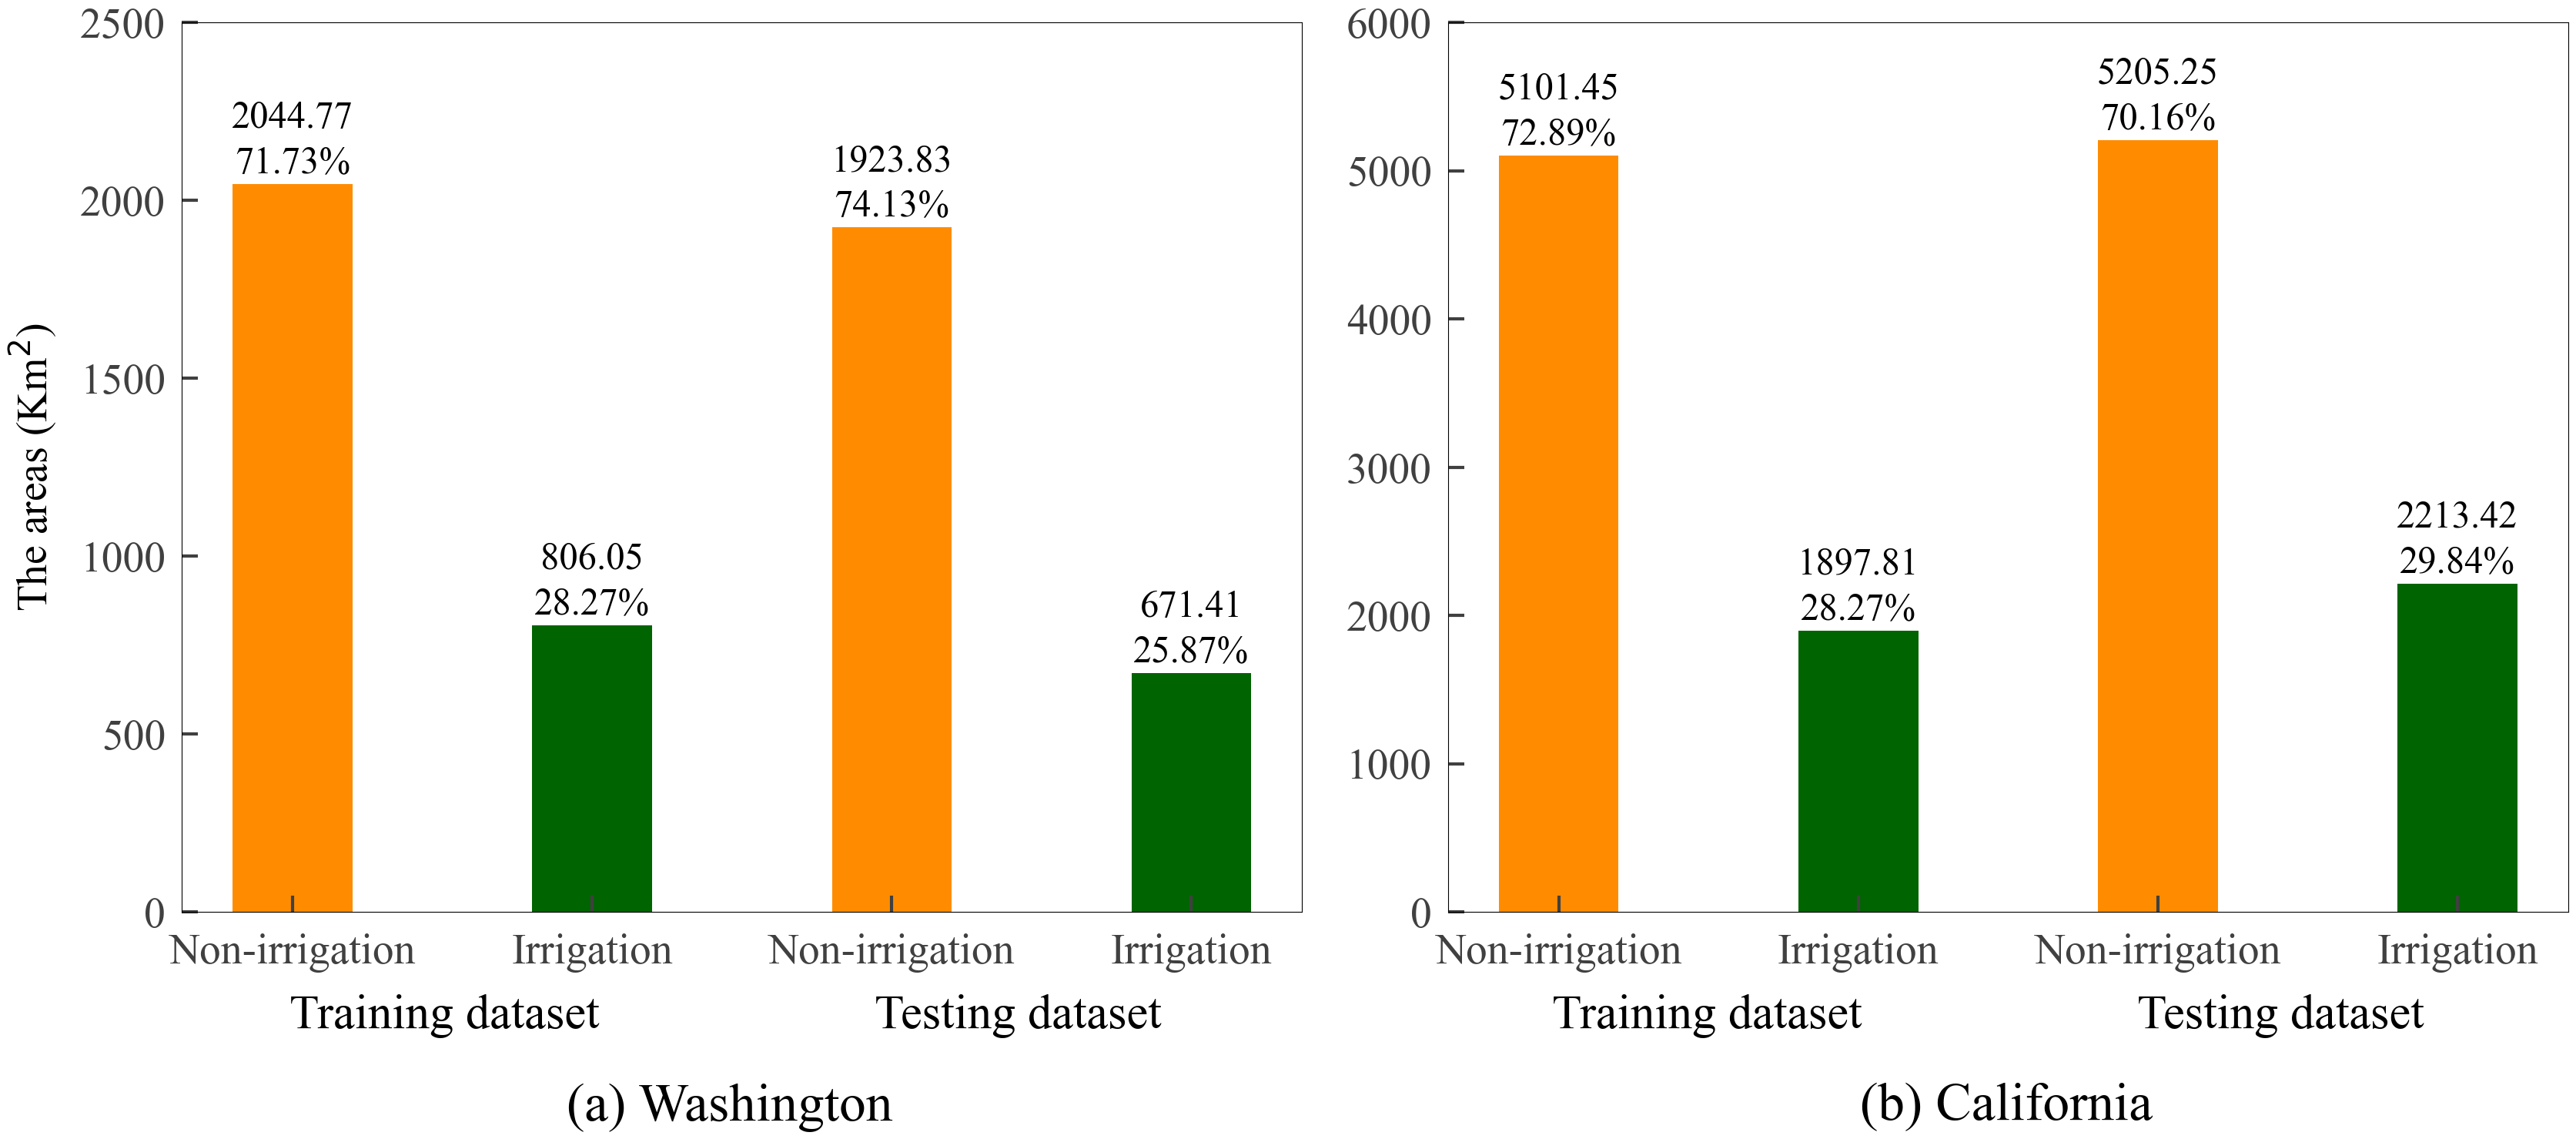

In [179]:
"使用matplotlib在同一张子图上画柱状图和折线图"
# 参考 https://kindhearted57.github.io/2020/11/07/%E5%A6%82%E4%BD%95%E4%BC%98%E9%9B%85%E7%9A%84%E4%BD%BF%E7%94%A8matplotlib%E5%9C%A8%E5%90%8C%E4%B8%80%E5%BC%A0%E5%9B%BE%E4%B8%8A%E7%94%BB%E6%9F%B1%E7%8A%B6%E5%9B%BE%E5%92%8C%E6%8A%98%E7%BA%BF%E5%9B%BE.html
# 参考 https://zhuanlan.zhihu.com/p/205656607
# 参考 https://blog.csdn.net/candice5566/article/details/121444185

# cmap_evi  = LinearSegmentedColormap.from_list('mycmap', ['darkorange','orange','gold','yellowgreen','green','darkgreen'])
colors = ['darkorange', 'darkgreen']

# 设定数据
# Wa_256_train = [2044.7653, 806.0507]  
# Wa_256_train的类别数目统计结果,类别值为0:20447653;类别值为1:8060507;像素分辨率为10m,因而类别值为0的面积就是20447653*10*10，
# 换算为km2，就是20447653*10*10➗1000➗1000；同理，类别值为1的面积就是8060507*10*10➗1000➗1000
"Wa_256_val的类别数目统计结果,类别值为0:19238290;类别值为1:6713966"
# Wa_256_val = [1923.829,  671.3966]
# Wa_256_val的类别数目统计结果,类别值为0:19238290;类别值为1:6713966;像素分辨率为10m,因而类别值为0的面积就是19238290*10*10，
# 换算为km2，就是19238290*10*10➗1000➗1000；同理，类别值为1的面积就是6713966*10*10➗1000➗1000
# Wa_256 = [2044.7653, 806.0507, 1923.829, 671.3966]  
Wa_256 = [2044.77, 806.05, 1923.83, 671.41]  
Wa_256_ratio = ['71.73%', '28.27%', '74.13%', '25.87%'] 

# Ca_256_train = [5101.4497, 1897.7951] 
# Ca_256_val = [5205.2514, 2213.4238] 
# Ca_256 = [5101.4497, 1897.7951, 5205.2514, 2213.4238] 
Ca_256 = [5101.45, 1897.81, 5205.25, 2213.42] 
Ca_256_ratio = ['72.89%', '28.27%', '70.16%', '29.84%'] 


# fig, ax = plt.subplots(3,2,figsize=(40,15))
fig = plt.figure(figsize=(40,15))
# 修改全局字体为Times New Roman
plt.rc('font',family='Times New Roman')

# 设定图中大小的参数

title_fontsize =28  # title的字体大小
y_labelsize = 40 # y_label的字体大小
x_labelsize = 40 # x_label的字体大小
linewidth = 3 # 图中线条的粗细
legend_fontsize = 18 # legendd的字体大小

labels = ['Non-irrigation', 'Irrigation', 'Non-irrigation', 'Irrigation']
bar_width = 0.4  # 柱子的宽度
interval = 0.25 # 柱子之间的间距

x_coordinates = np.arange(len(labels))  # x轴刻度标签位置
# print(x_coordinates)



# 图1
f_ax1 = fig.add_subplot(121)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
# l1, = f_ax1.bar(x=x_coordinates-width,height=df_Precision["Unet"].values.tolist(),width=width,label='1') # 只能返回一个l1,不是返回2个
# l1 = f_ax1.bar(x=x_coordinates-bar_width,height=Wa_256_train,width=bar_width,label='Train')
# l2 = f_ax1.bar(x=x_coordinates,height=Wa_256_val,width=bar_width,label='Val')
# l1 = f_ax1.bar(x=x_coordinates-interval,height=Wa_256_train,width=bar_width,label='Train')
# l2 = f_ax1.bar(x=x_coordinates+interval,height=Wa_256_val,width=bar_width,label='Val')
l = f_ax1.bar(x=x_coordinates,height=Wa_256,align='center',width=bar_width,color=colors, tick_label=labels)

# 设置y轴上的label显示范围
f_ax1.set_ylim(0,2500)  # 根据自己的需要来设定
# x轴 tick_label的位置和内容
# plt.xticks(x_coordinates, labels=labels)
# f_ax1.set_xlim(0,13)
# plt.locator_params('x',nbins=6)
# plt.locator_params('x')

# x轴 label的位置和内容
# plt.xlabel("特征",labelpad=8.5)
# f_ax1.set_xlabel('Washington', labelpad=8.5)

# y轴 label的位置和内容
# plt.ylabel("特征",fontsize = 20, labelpad=8.5)
f_ax1.set_ylabel('The areas (Km$^{2}$)', fontsize = 40, labelpad=20)  # 其中2为上角标
# f_ax1.set_xlabel('Washington', fontsize = 40, labelpad=60)



# title
# f_ax1.set_title('Precision',loc='left',fontsize=title_fontsize)
# ylabel .
# f_ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4f'))
# xlabel
# f_ax1.xaxis.set_ticklabels(['2018', '2019', '2020', '2021'])
# f_ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# f_ax1.set_xlabel('Month')

# fontsize  调整坐标轴标签到坐标轴的距离,pad=15
f_ax1.yaxis.set_tick_params(labelsize=y_labelsize, pad=15)
f_ax1.xaxis.set_tick_params(labelsize=x_labelsize, pad=20)



# 改变刻度和刻度标签的外观
f_ax1.tick_params("x",which="major",
                 length=15,width = 3.0,
                 colors = "0.25")
f_ax1.tick_params("y",which="major",
                  length=15,width = 3.0,
                  colors = "0.25")


#给每个柱子上面添加标注
"""Attach a text label above each bar in *rects*, displaying its height."""
i = 0
for rect in l:
    height = rect.get_height()
    f_ax1.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height), #xy控制的是，标注哪个点，x=x坐标+width/2, y=height，即柱子上平面的中间
                   xytext=(0, 45), #文本放置的位置，如果有textcoords，则表示是针对xy位置的偏移，否则是图中的固定位置
                   textcoords="offset points", # 两个选项 'offset pixels'，'offset pixels'
                   ha='center',
                   va='bottom',#代表verticalalignment 和 horizontalalignment，控制水平对齐和垂直对齐。
                   fontsize=35)
    f_ax1.annotate('{}'.format(Wa_256_ratio[i]),
                   xy=(rect.get_x() + rect.get_width() / 2, height), #xy控制的是，标注哪个点，x=x坐标+width/2, y=height，即柱子上平面的中间
                   xytext=(0, 3), #文本放置的位置，如果有textcoords，则表示是针对xy位置的偏移，否则是图中的固定位置
                   textcoords="offset points", # 两个选项 'offset pixels'，'offset pixels'
                   ha='center',
                   va='bottom',#代表verticalalignment 和 horizontalalignment，控制水平对齐和垂直对齐。
                   fontsize=35)
    i += 1


# 背景虚线格网
# plt.grid(True)
# plt.grid(linestyle="--") 

# 设置legend 的 位置和布局
# plt.legend(loc='upper left',fontsize=legend_fontsize,ncol=3)


# plt.xticks(x_coordinates, labels=labels)

# 对每一列添加说明
f_ax1.text(0+0.16,0+0.01,'Training dataset',transform=fig.transFigure, fontsize=45, fontdict=None)#
f_ax1.text(0+0.35,0+0.01,'Testing dataset',transform=fig.transFigure, fontsize=45, fontdict=None)#
f_ax1.text(0+0.25,0-0.07,'(a) Washington',transform=fig.transFigure, fontsize=50, fontdict=None)


# 图2
f_ax2 = fig.add_subplot(122)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
# l1, = f_ax1.bar(x=x_coordinates-width,height=df_Precision["Unet"].values.tolist(),width=width,label='1') # 只能返回一个l1,不是返回2个
# l1 = f_ax2.bar(x=x_coordinates-bar_width,height=Ca_256_train,width=bar_width,label='Wa')
# l2 = f_ax2.bar(x=x_coordinates+bar_width,height=Ca_256_val,width=bar_width,label='Ca')
# l1 = f_ax2.bar(x=x_coordinates-interval,height=Ca_256_train,width=bar_width,label='train')
# l2 = f_ax2.bar(x=x_coordinates+interval,height=Ca_256_val,width=bar_width,label='val')
l = f_ax2.bar(x=x_coordinates,height=Ca_256,align='center',width=bar_width,color=colors, tick_label=labels)

# 设置y轴上的label显示范围
f_ax2.set_ylim(0,6000)  # 根据自己的需要来设定
# xlabel label的位置和内容
# plt.xticks(x_coordinates, labels=labels)
# f_ax2.set_xlim(0,13)
# plt.locator_params('x',nbins=6)
# plt.locator_params('x')

# title
# f_ax2.set_title('Recall',loc='left',fontsize=title_fontsize)
# ylabel .
# f_ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# xlabel
# f_ax1.xaxis.set_ticklabels(['2018', '2019', '2020', '2021'])
# f_ax1.set_xlabel('Month')

# fontsize
f_ax2.yaxis.set_tick_params(labelsize=y_labelsize, pad=15)
f_ax2.xaxis.set_tick_params(labelsize=x_labelsize, pad=20)

# 改变刻度和刻度标签的外观
f_ax2.tick_params("x",which="major",
                 length=15,width = 3.0,
                 colors = "0.25")
f_ax2.tick_params("y",which="major",
                  length=15,width = 3.0,
                  colors = "0.25")

#给每个柱子上面添加标注
"""Attach a text label above each bar in *rects*, displaying its height."""
i = 0
for rect in l:
    height = rect.get_height()
    f_ax2.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height), #xy控制的是，标注哪个点，x=x坐标+width/2, y=height，即柱子上平面的中间
                   xytext=(0, 45), #文本放置的位置，如果有textcoords，则表示是针对xy位置的偏移，否则是图中的固定位置
                   textcoords="offset points", # 两个选项 'offset pixels'，'offset pixels'
                   ha='center',
                   va='bottom',#代表verticalalignment 和 horizontalalignment，控制水平对齐和垂直对齐。
                   fontsize=35)
    f_ax2.annotate('{}'.format(Ca_256_ratio[i]),
                   xy=(rect.get_x() + rect.get_width() / 2, height), #xy控制的是，标注哪个点，x=x坐标+width/2, y=height，即柱子上平面的中间
                   xytext=(0, 3), #文本放置的位置，如果有textcoords，则表示是针对xy位置的偏移，否则是图中的固定位置
                   textcoords="offset points", # 两个选项 'offset pixels'，'offset pixels'
                   ha='center',
                   va='bottom',#代表verticalalignment 和 horizontalalignment，控制水平对齐和垂直对齐。
                   fontsize=35)
    i += 1

# # 背景虚线格网
# plt.grid(True)
# plt.grid(linestyle="--") 

# 设置legend 的 位置和布局
# plt.legend(loc='upper left',fontsize=legend_fontsize,ncol=3)

# plt.xticks(x_coordinates, labels=labels)

f_ax1.text(0+0.57,0+0.01,'Training dataset',transform=fig.transFigure, fontsize=45, fontdict=None)#
f_ax1.text(0+0.76,0+0.01,'Testing dataset',transform=fig.transFigure, fontsize=45, fontdict=None)#
f_ax1.text(0+0.67,0-0.07,'(b) California',transform=fig.transFigure, fontsize=50, fontdict=None)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.13, hspace=0.1)
# 参考 https://blog.csdn.net/ggt55ng6/article/details/88879689

plt.show()
# fig.savefig(os.path.join(path,'downscaling image resolution_Ca.png'),dpi=300,bbox_inches='tight')